# DA - NCAA - Feature Selection

## Suggestion A

In this example we use Random Tree Forest method to evaluate the features.  
It's a built in function of importance of features in the model.  

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, model_selection, metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/All_PCBR_For_2002_2016_Matchup.csv')
data.head()

,Season,WL,T1_AdjEM,T1_AdjO,T1_AdjD,T1_AdjT,T1_Luck,T1_SOSADjEM,T1_SOSOppO,T1_SOSOppD,T1_NCSOSAdjEM,T2_AdjEM,T2_AdjO,T2_AdjD,T2_AdjT,T2_Luck,T2_SOSADjEM,T2_SOSOppO,T2_SOSOppD,T2_NCSOSAdjEM
0,2002,0,-8.69,98.1,106.8,74.2,0.097,-15.24,93.2,108.4,-2.29,-1.20,98.6,99.8,68.9,-0.070,-3.90,98.7,102.6,-1.15
1,2002,1,18.73,111.9,93.2,69.1,0.076,9.90,106.3,96.4,2.49,-2.48,97.5,100.0,71.6,0.061,-5.12,100.3,105.4,-5.36
2,2002,1,20.52,117.2,96.7,73.0,0.080,14.48,109.9,95.4,18.68,8.90,106.1,97.2,64.8,-0.058,0.23,101.4,101.2,2.86
3,2002,1,34.14,118.9,84.7,75.9,-0.027,10.09,107.8,97.7,7.52,-5.33,95.2,100.5,68.0,0.039,-10.81,95.4,106.2,-1.40
4,2002,1,24.80,112.0,87.2,66.8,-0.049,13.66,109.0,95.4,13.51,14.11,109.4,95.2,63.6,0.011,5.87,104.9,99.0,3.57


In [3]:
# range goes until 2017 not including (until 2016 including)
X_train = data.loc[data.Season.isin(range(2002, 2017))].drop(['WL','Season'], axis=1)
y_train = data.loc[data.Season.isin(range(2002, 2017))].WL

In [4]:
# Feauture Importance
print("RF Started...")
random_state = np.random.RandomState(0)

cls_rf = RandomForestClassifier(n_estimators = 100, random_state=random_state)
cls_rf = cls_rf.fit(X_train, y_train)

importances = cls_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in cls_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

RF Started...
Feature ranking:
1. feature 0 (0.132463) T1_AdjEM
2. feature 9 (0.124844) T2_AdjEM
3. feature 10 (0.082099) T2_AdjO
4. feature 1 (0.079661) T1_AdjO
5. feature 11 (0.065771) T2_AdjD
6. feature 2 (0.062851) T1_AdjD
7. feature 4 (0.045396) T1_Luck
8. feature 13 (0.045357) T2_Luck
9. feature 14 (0.043963) T2_SOSADjEM
10. feature 5 (0.043282) T1_SOSADjEM
11. feature 7 (0.036335) T1_SOSOppD
12. feature 8 (0.035578) T1_NCSOSAdjEM
13. feature 16 (0.034597) T2_SOSOppD
14. feature 6 (0.034424) T1_SOSOppO
15. feature 17 (0.034158) T2_NCSOSAdjEM
16. feature 15 (0.033208) T2_SOSOppO
17. feature 3 (0.033127) T1_AdjT
18. feature 12 (0.032889) T2_AdjT


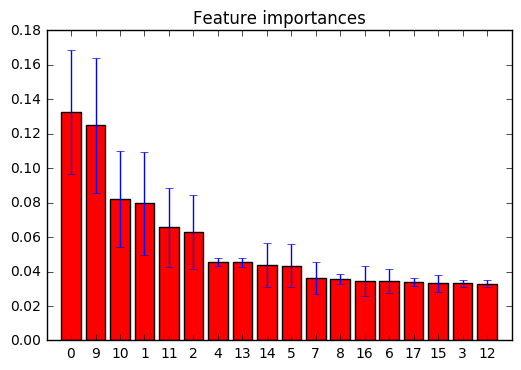

In [5]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()